In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from utils import *
plt.rcParams['text.usetex'] = True 


$$ \tau \frac{dV}{dt} = V_0 - V(t)+RI(t)$$

In [2]:

INeuron = {
    'V0': -70,
    'Vq': -55,
    'Vinit':-70,
    'w1': 1,
    'w2': 1,
    'tau': 1, 
    'refr':300,
    't0': 0, 
    'tf': 10,
    'N':1000,
    'k':10,
    'window': 200,
    'lag':300,
    'OutA': 20
}

Rout = ReceptorNeuron('I2', 'I1', INeuron['N'], INeuron['k'], INeuron['lag'], amp1=20, amp2=20, signal='window', window=INeuron['window'])
INeuron.update(Rout)
t, Iout, V_I = LIFNeuron(INeuron)

O1Neuron = {
    'V0': -70,
    'Vq': -55,
    'Vinit':-70,
    'w1': .8,
    'w2': .8,
    'tau': 1, 
    'refr':300,
    't0': 0, 
    'tf': 10,
    'N':1000,
    'k':10,
    'window': 200,
    'lag':500,
    'I1': Rout['I1'],
    'I2': Iout,
    'OutA': 20
    }
O2Neuron = {
    'V0': -70,
    'Vq': -55,
    'Vinit':-70,
    'w1': .8,
    'w2': .8,              
    'tau': 1, 
    'refr':300,
    't0': 0, 
    'tf': 10,
    'N':1000,
    'k':10,
    'window': 200,
    'lag':500,
    'I1': Rout['I2'],
    'I2': Iout,
    'OutA': 20
    }

t_O1, O1out, V_O1 = LIFNeuron(O1Neuron)
t_O2, O2out, V_O2 = LIFNeuron(O2Neuron)


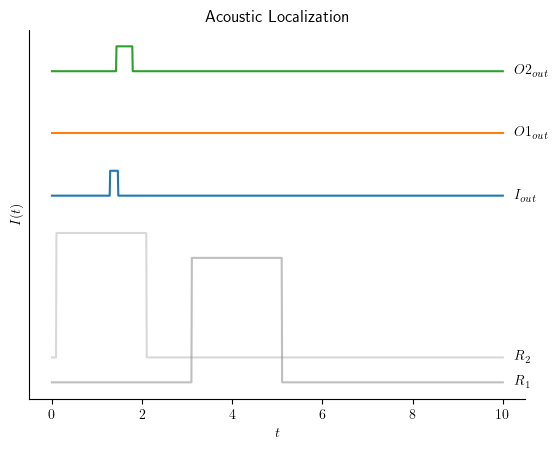

In [3]:
x_offset = .25 

plt.plot(t_O1, 0.05 * INeuron['I1'] , color='grey', alpha=0.5)
plt.text(t_O1[-1] + x_offset, INeuron['I1'][-1] , '$R_1$', va='center', ha='left')

plt.plot(t_O1, 0.05 * INeuron['I2']+.2 , color='grey', alpha=0.3)
plt.text(t_O1[-1] + x_offset, INeuron['I2'][-1]+.2 , '$R_2$', va='center', ha='left')

# plt.plot(t_O1, V_I, '--', alpha=.5)
# plt.text(t_O1[-1] + x_offset, V_I[-1], '$V_I$', va='center', ha='left')

plt.plot(t_O1, .01*Iout+1.5)
plt.text(t_O1[-1] + x_offset, Iout[-1]+1.5 , '$I_{out}$', va='center', ha='left')

plt.plot(t_O1, .01*O1out+2 )
plt.text(t_O1[-1] + x_offset, O1out[-1]+2 , '$O1_{out}$', va='center', ha='left')

plt.plot(t_O1, .01*O2out+2.5 )
plt.text(t_O1[-1] + x_offset, O2out[-1]+2.5 , '$O2_{out}$', va='center', ha='left')

plt.title('Acoustic Localization')
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.yticks([])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


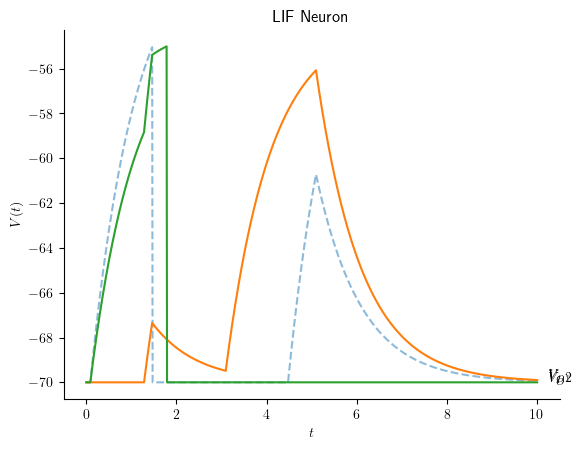

In [4]:
x_offset = .25  

plt.plot(t_O1, V_I, '--', alpha=.5)
plt.text(t_O1[-1]+x_offset, V_I[-1], '$V_I$', ha='left')
plt.plot(t_O1, V_O1)
plt.text(t_O1[-1]+x_offset, V_O1[-1], '$V_{O1}$', ha='left')

plt.plot(t_O1, V_O2)
plt.text(t_O1[-1]+x_offset, V_O2[-1], '$V_O2$', ha='left')

plt.title('LIF Neuron')
plt.xlabel('$t$')
plt.ylabel('$V(t)$')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)